# This notebook contains the code to visualize heatmap generated by Grad-CAM to understand where CNN is looking at to make predictions

In [4]:
# Uncomment and run the line below if you don't have keras and hvplot installed
# !pip install -q keras
!pip install hvplot

     |████████████████████████████████| 2.3MB 2.9MB/s 
     |████████████████████████████████| 4.0MB 36.0MB/s 
     |████████████████████████████████| 71kB 25.5MB/s 


In [5]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage import io
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pickle
import sys

import holoviews as hv 

hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### Read the imagnet class file from github

In [35]:
import io
!wget -O imagenetClass.txt https://github.com/shanky221341/convnet_bokeh/blob/master/files/imagenetClass.txt?raw=true
s = open('imagenetClass.txt', 'r').read()
classes=eval(s)

--2019-10-07 15:46:46--  https://github.com/shanky221341/convnet_bokeh/blob/master/files/imagenetClass.txt?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shanky221341/convnet_bokeh/raw/master/files/imagenetClass.txt [following]
--2019-10-07 15:46:46--  https://github.com/shanky221341/convnet_bokeh/raw/master/files/imagenetClass.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shanky221341/convnet_bokeh/master/files/imagenetClass.txt [following]
--2019-10-07 15:46:46--  https://raw.githubusercontent.com/shanky221341/convnet_bokeh/master/files/imagenetClass.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

### A generic function to create GRAD-CAM images

In [0]:
def grad_cam(img,model,classes,layer_name):
  img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(img) 
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  conv_layer = model.get_layer(layer_name)
  grads = K.gradients(class_output, conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0,1,2))
  iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(conv_layer_output_value.shape[2]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
  return heatmap,superimposed_img

### Load the pre-trained VGG model on imagenet

In [32]:
model = VGG16(weights="imagenet")
layers=model.layers
layers_names=[layer.name for layer in layers]
layers_names1=[layer_name for layer_name in layers_names if 'conv' in layer_name or 'pool' in layer_name]





553467904/553467096 [==============================] - 5s 0us/step




### Load the image of dog and apply GRAD-CAM on it.

In [0]:
from skimage import io
dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")

In [0]:
hv_images=[]
for layer in layers_names1:
  a,b= grad_cam(dog,model,classes,layer)
  hv_images.append(hv.RGB(a,label="HM-"+layer.upper().replace("_"," ")))
  hv_images.append(hv.RGB(b,label="SP-"+layer.upper().replace("_"," ")))
  
img=hv_images[0]
for im in hv_images[1:]:
  img+=im  

## GRAD-CAM on dog's image on all convolution and pooling layers 

:Layout
   .RGB.HM_hyphen_minus_BLOCK1_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK1_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK1_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK1_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK1_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK1_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK2_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK2_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK2_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK2_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK2_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK2_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_POOL  :RGB   [x,y]   (R,G,B)
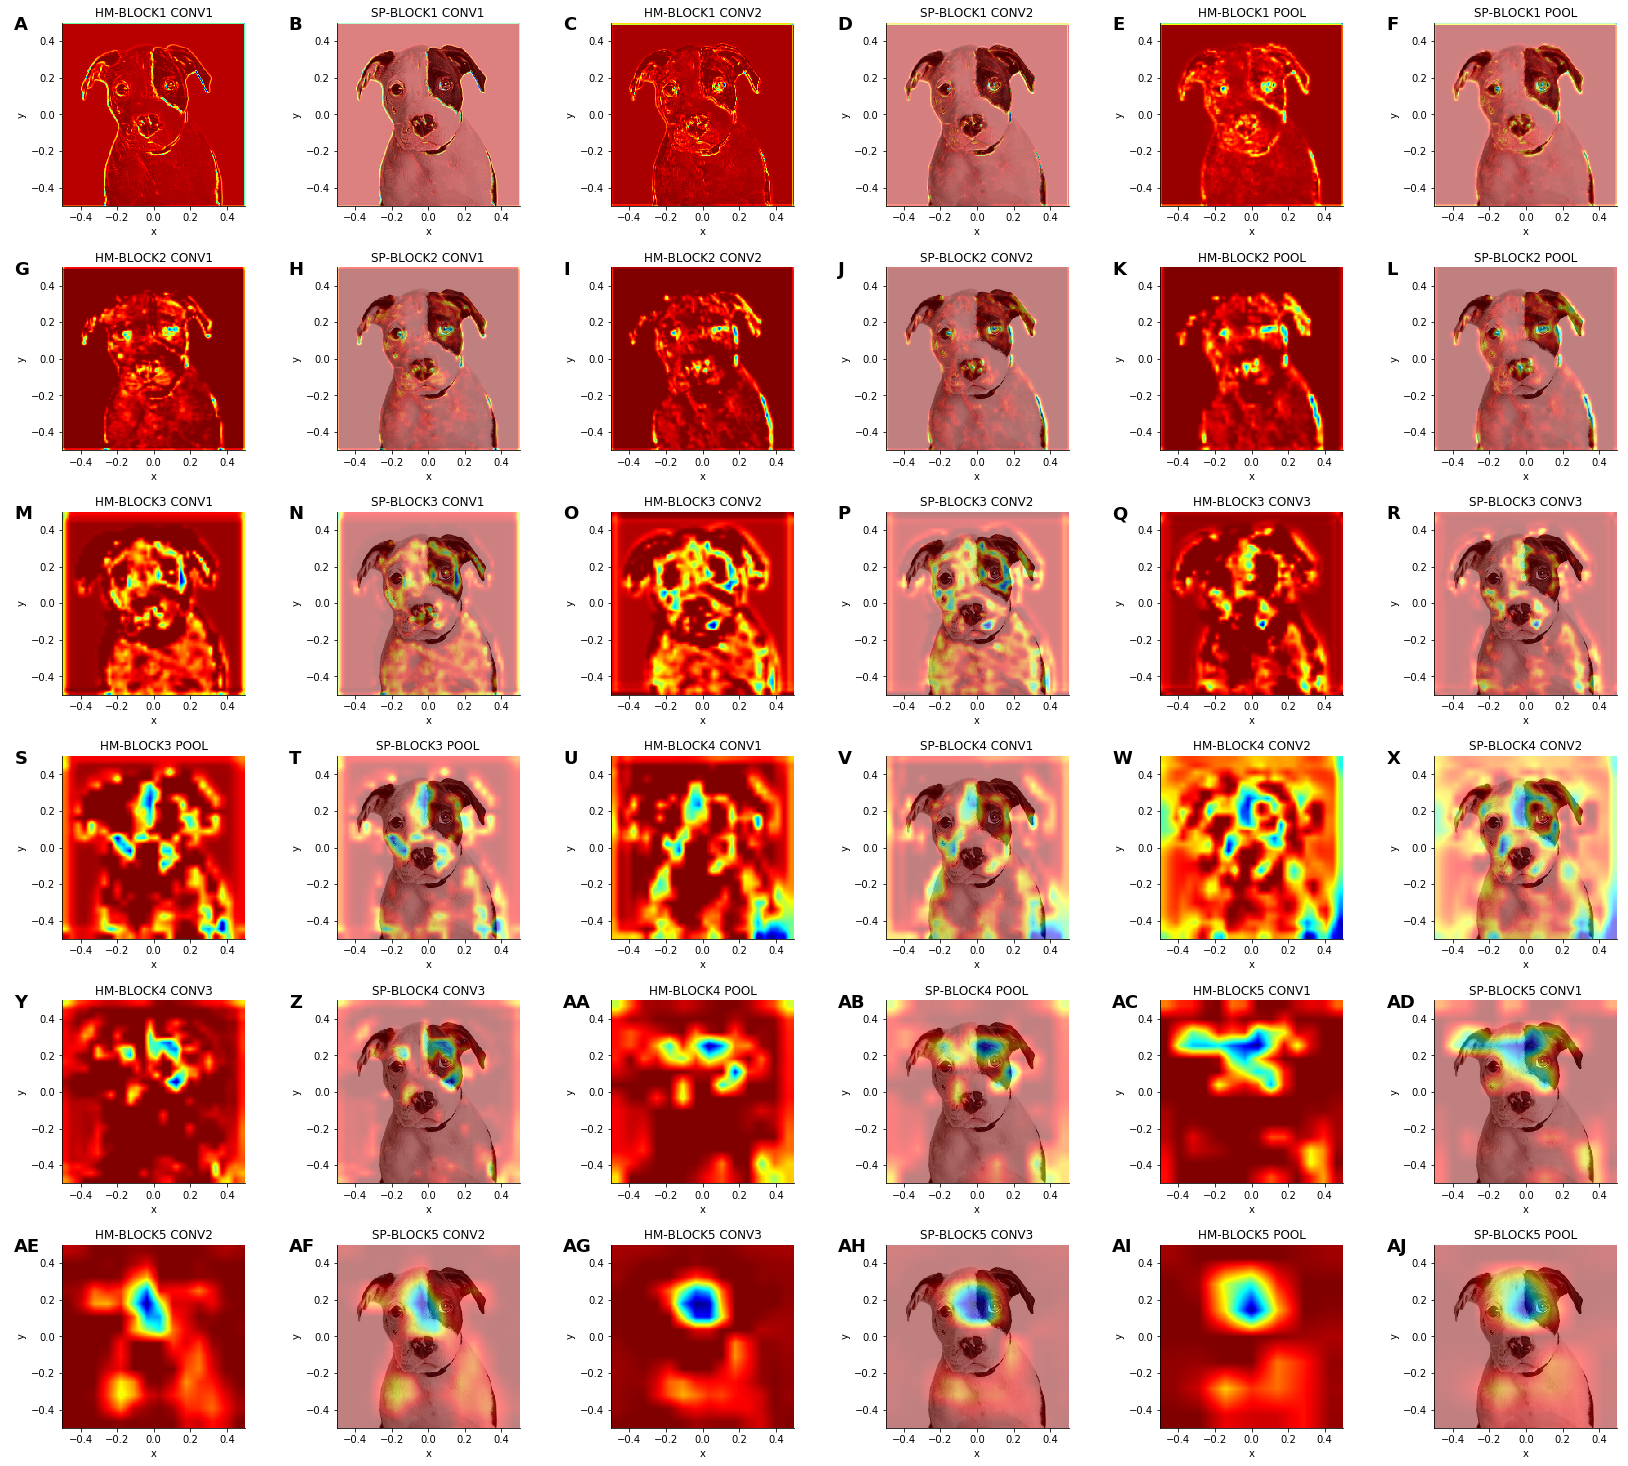

In [37]:
img.cols(6)

### Load the image of sunglass and apply GRAD-CAM on it.

In [39]:
from skimage import io
!wget -O "sg.jpg" "https://github.com/shanky221341/convnet_bokeh/blob/master/images/imgg1.jpg?raw=true"
img_subglass=io.imread("sg.jpg")

--2019-10-07 15:49:23--  https://github.com/shanky221341/convnet_bokeh/blob/master/images/imgg1.jpg?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shanky221341/convnet_bokeh/raw/master/images/imgg1.jpg [following]
--2019-10-07 15:49:24--  https://github.com/shanky221341/convnet_bokeh/raw/master/images/imgg1.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shanky221341/convnet_bokeh/master/images/imgg1.jpg [following]
--2019-10-07 15:49:24--  https://raw.githubusercontent.com/shanky221341/convnet_bokeh/master/images/imgg1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443...

In [0]:
hv_images=[]
for layer in layers_names1:
  a,b= grad_cam(img_subglass,model,classes,layer)
  hv_images.append(hv.RGB(a,label="HM-"+layer.upper().replace("_"," ")))
  hv_images.append(hv.RGB(b,label="SP-"+layer.upper().replace("_"," ")))
  
img=hv_images[0]
for im in hv_images[1:]:
  img+=im  

## GRAD-CAM on sunglass's image on all convolution and pooling layers

:Layout
   .RGB.HM_hyphen_minus_BLOCK1_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK1_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK1_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK1_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK1_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK1_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK2_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK2_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK2_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK2_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK2_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK2_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK3_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK3_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK4_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK4_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_CONV1 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_CONV2 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_CONV3 :RGB   [x,y]   (R,G,B)
   .RGB.HM_hyphen_minus_BLOCK5_POOL  :RGB   [x,y]   (R,G,B)
   .RGB.SP_hyphen_minus_BLOCK5_POOL  :RGB   [x,y]   (R,G,B)
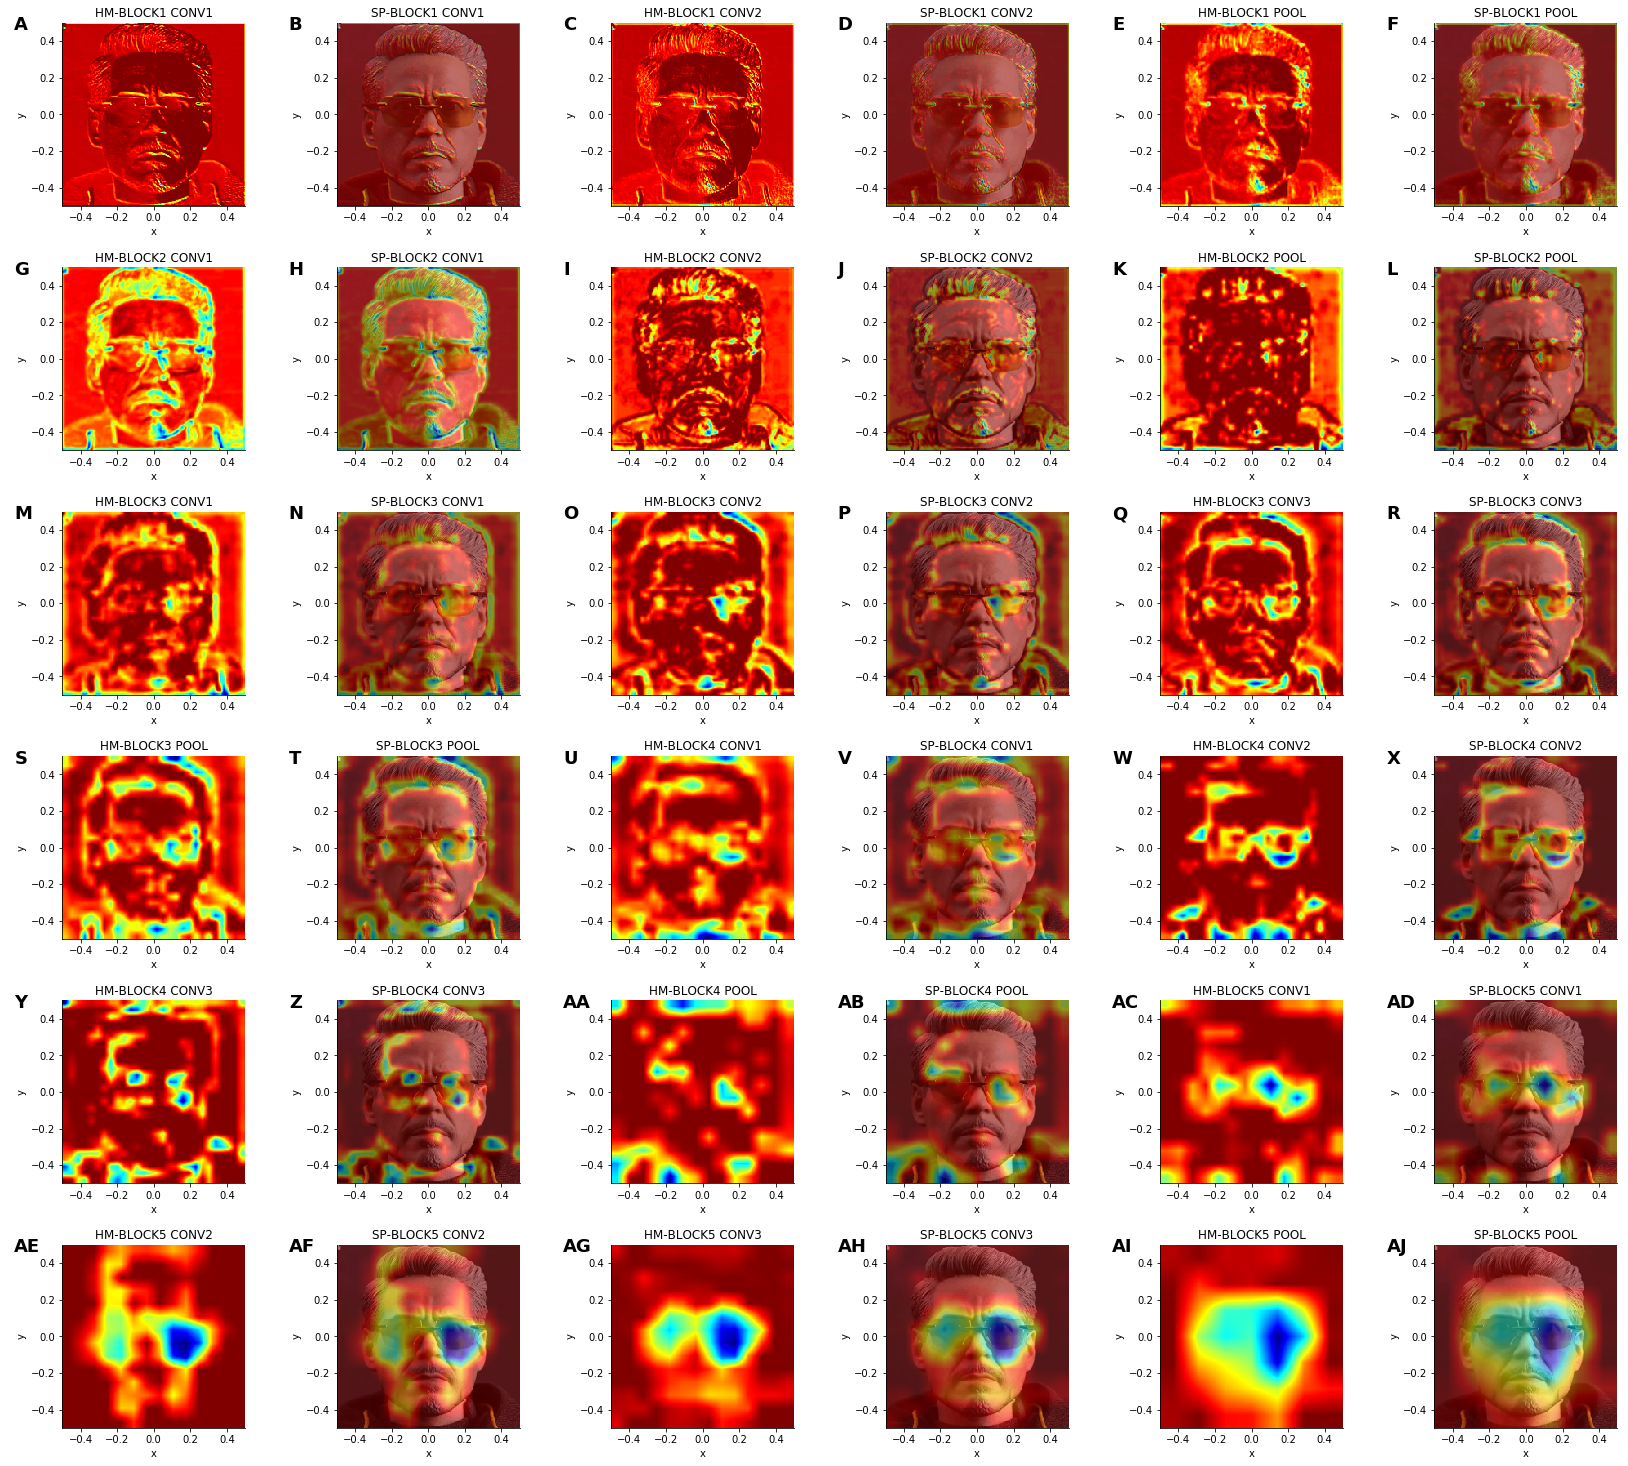

In [42]:
img.cols(6)